<a href="https://colab.research.google.com/github/ritikpatel17/CV-Project/blob/main/CV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easygui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 1.5 MB/s eta 0:00:00


Saving test1.jpg to test1 (1).jpg


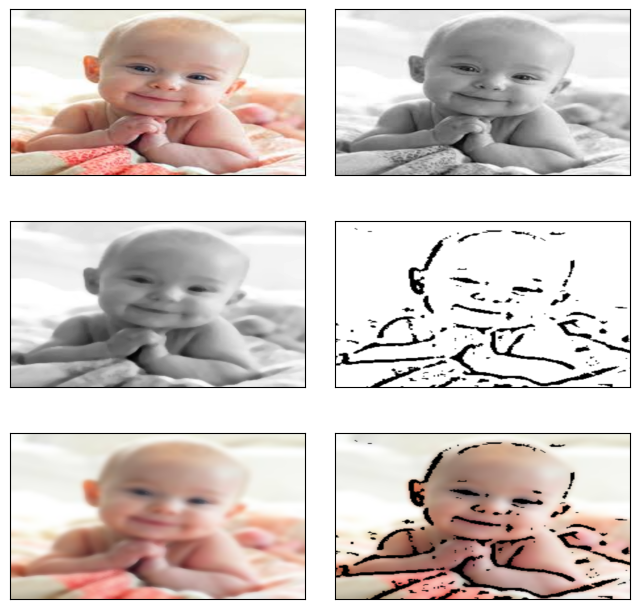

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def cartoonify(image_path):
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    if original_image is None:
        print("Can not find any image. Choose an appropriate file.")
        return

    resized_original = cv2.resize(original_image, (960, 540))
    gray_scale = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    resized_gray = cv2.resize(gray_scale, (960, 540))

    # Applying median blur to smoothen the image
    smoothed_gray = cv2.medianBlur(gray_scale, 5)
    resized_smoothed = cv2.resize(smoothed_gray, (960, 540))

    # Retrieving the edges for cartoon effect
    edge_threshold = cv2.adaptiveThreshold(
        smoothed_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9
    )
    resized_edges = cv2.resize(edge_threshold, (960, 540))

    # Applying bilateral filter to remove noise and keep edges sharp
    color_image = cv2.bilateralFilter(original_image, 9, 300, 300)
    resized_color = cv2.resize(color_image, (960, 540))

    # Masking edged image with our "BEAUTIFY" image
    cartoon_image = cv2.bitwise_and(color_image, color_image, mask=edge_threshold)
    resized_cartoon = cv2.resize(cartoon_image, (960, 540))

    # Plotting the whole transition
    images = [resized_original, resized_gray, resized_smoothed, resized_edges, resized_color, resized_cartoon]
    fig, axes = plt.subplots(3, 2, figsize=(8, 8), subplot_kw={"xticks": [], "yticks": []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for ax, img in zip(axes.flat, images):
        ax.imshow(img, cmap="gray")

    plt.show()

def upload_and_cartoonify():
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded.")
        return

    image_path = list(uploaded.keys())[0]
    cartoonify(image_path)

# Call the function
upload_and_cartoonify()
